# Fixed Effect Methods

## Overview

以下のlinear unobserved modelを考える

$$
y_{it} = \mathbf x_{it}\mathbf\beta + c_i + u_{it} \tag{1}
$$

where

- i: an individual
- t: time index
- $c_i$: unobserved factor

Random Effect Modelと異なる点は、REは$c_i$は$\mathbf x_{it}$とorthogonalであると仮定しGLSで解く一方、FEは$c_i$と$\mathbf x_{it}$は相関していることを想定している。(1)の式は以下のように書くこともできる

$$
\mathbf y_{i} = \mathbf X_{i}\mathbf\beta + c_i\mathbf j_{T} + \mathbf u_{i} \tag{2}
$$

where $\mathbf j_{T}$: $T\times 1$ vector of ones

### Assumption FE.1

$$
E[u_{it}|\mathbf x_{it}, c_i] = 0 t = 1, 2, ..., T
$$


### REMARKS

- メリット：covariatesと相関したtime-constant ommitted variablesが存在してもpartial effectは推定することができる
- デメリット：他のtime-constant factorのpartial effectは推定できなくなる

デメリットの例として、個人を単位にした分析ならばgenderやrace、企業を単位にした分析ならば業種、地理空間を対象にした分析ならば川の近くフラグなどのtime-constantなfactorは推定できない。

### General specification

- $d2_t, ... dT_t$: time period dummy, $ds_t = 1$ if $s = t$
- $\mathbf z_i$: a vector of time-constant observables
- $w_{it}$: a vector of time-varying variables


$$
y_{it} = \theta_1 + \sum_{s=2}^T\theta_s ds_t + \mathbf z_i\gamma_1 +  \sum_{s=2}^T\mathbf z_i \gamma_s + \mathbf w_{it}\mathbf\delta + c_i + u_{it} \tag{3}
$$

and

$$
E[u_{it}|\mathbf z_i, \mathbf w_{i1}, ..., \mathbf w_{iT}, c_i] = 0
$$

このとき、$\theta_1 + \mathbf z_i\gamma_1$は$c_i$と識別することはできない。ただし、time-constant variableのeffectがtime-changingなのかの識別はできる。

## Within transformation: FE transformation


The FE transformationはdemeaningをすることで得られる。Eq (1)で説明すると

$$
y_{it} - \bar y_{i} = (\mathbf x_{it} - \mathbf{\bar x_{i}})\mathbf\beta + u_{it} - \bar u_{i} \tag{4}
$$

or

$$
\ddot{y_{it}} = \ddot{\mathbf x_{it}}\mathbf\beta + \ddot{\mathbf u_{it}} \tag{5}
$$

where $\bar y_{i} = \frac{1}{T}\sum_{t=1}^Ty_{it}$

### Assumption FE 1.2

$$
E(\ddot{\mathbf{x_{it}}}'\ddot{\mathbf{u_{it}}}) = 0
$$

これはAssumption FE.1が成立していれば直ちに成立する。

### Assumption FE 2


$$
\text{rank}\left(\sum_{t = 1}^TE(\ddot{\mathbf x_{it}}'\ddot{\mathbf x_{it}})\right) = rank\left[E(\ddot{\mathbf X_{i}}'\ddot{\mathbf X_{i}})\right] = K
$$

### 推定手法

- Pooled OLS

$$
\hat{\mathbf{\beta}_{FE}}  = \left(\sum_{i = 1}^N \ddot{\mathbf X_{i}}'\ddot{\mathbf X_{i}}\right)^{-1}\left(\sum_{i = 1}^N \ddot{\mathbf X_{i}}'\ddot{\mathbf y_{i}}\right) = \left(\sum_{i = 1}^N \sum_{t = 1}^T\ddot{\mathbf x_{i}}'\ddot{\mathbf x_{i}}\right)^{-1}\left(\sum_{i = 1}^N\sum_{t = 1}^T \ddot{\mathbf x_{i}}'\ddot{y_{i}}\right)
$$

### Asymptotic Inference with FE

The next assumption ensures that FE is efficient:

#### Assumption FE.3


$$
E(\mathbf u_i \mathbf u_i'|\mathbf x_i, c_i) = \sigma^2_u\mathbf I_T
$$

これはidiosyncratic erros $u_{it}$ が　constant variance across t であり、serially uncorrelatedであることを示唆している。

#### The variance of $\ddot{u}_{it}$

$$
\begin{aligned}
E[\ddot{u}_{it}^2] &= E[(u_{it} - \bar u_i)^2] = E[u_{it}^2] + E[\bar u_i^2] - 2E[u_{it}\bar u_i]\\
&= \sigma_u^2 + \sigma_u^2/T - 2\sigma_u^2/T = \sigma_u^2(1 - 1/T)
\end{aligned}
$$

よってhomeskedasticity across tは確認できた。

#### Covarinace of $\ddot{u}_{it}$ and $\ddot{u}_{is}$

$$
\begin{aligned}
E(\ddot{u}_{it}\ddot{u}_{is}) &= E[(u_{it} - \bar u_{i})(u_{is} - \bar u_{i})] = E[(u_{it}u_{is})] - E[(u_{it}\bar u_{i})] - E[(u_{is}\bar u_{i})] + E[\bar u_i^2]\\
&= 0 - \sigma_u^2/T - \sigma_u^2/T + \sigma_u^2/T = - \sigma_u^2/T < 0
\end{aligned}
$$

Then,

$$
Corr(\ddot{u}_{it}, \ddot{u}_{is}) = -1/(T-1)
$$

しかし、これは大した問題にはならない。これを確認するためにAsynmptotic variance of $\hat{\mathbb{\beta}}_{FE}$を計算する：

$$
\sqrt{N}(\hat{\beta}_{FE} - \beta) = \left(N^{-1}\sum_{i=1}^N\ddot{X_i}'\ddot{X_i}\right)^{-1}\left( N^{-1/2} \sum_{i=1}^N \ddot{X_i}'u_i\right)
$$

ここで
$$
\mathbf Q_T = I_T - l_T(l_T'l_T)^{-1}l_T'
$$
と定義すると

$$
\ddot{X_i}'\ddot{u_i} = X_i'Q_Tu_i = \ddot{X_i}'u_i
$$

よって

$$
\sqrt{N}(\hat\beta_{FE} - \beta) \sim Normal(\mathbf 0, \sigma_u^2[E(\ddot{X_i}'\ddot{X_i})]^{-1})
$$

Then,

$$
\text{Avar}(\hat\beta_{FE}) = \sigma_u^2[E(\ddot{X_i}'\ddot{X_i})]^{-1}/N
$$

よって sample analogueは

$$
\widehat {\text{Avar}(\hat\beta_{FE})}=  \hat\sigma_u^2\left(\sum \ddot{X_i}'\ddot{X_i}\right)^{-1} = \hat\sigma_u^2\left(\sum_{i=1}^N\sum_{t=1}^T \ddot{x_{it}}'\ddot{x_{it}}\right)^{-1}
$$

### Compute variance

$$
\hat{\sigma_u^2} = \frac{ \sum_{i=1}^N\sum_{t=1}^T(\ddot{y_{it}} - \ddot{x_{it}}\hat\beta_{FE})^2}{N(T - 1) - K}
$$

#### Tips

- standard regression packageで計算する場合は出力された$\hat\sigma_u$に$[(NT-K)/[N(T-1) - K]]^{1/2}$を掛ければ良い
- demeanでなくても、unitごとのdummy変数を定義してPooled OLSでも良い

## Practice: FE Estimation of the Effects of JOb Training Grants

- data: jtrain1.dta (STATAの公式ページより入手可能, [here](https://www.stata.com/data/jwooldridge/eacsap/jtrain1.dta))
- data定義：http://fmwww.bc.edu/ec-p/data/wooldridge/datasets.list.html
- Question: Job training grantの賃金に与える影響を分析せよ


#### Import

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from scipy.stats import t
import matplotlib.pyplot as plt

#### Read data

  Obs:   471

 1. year                     1987, 1988, or 1989
 2. fcode                    firm code number
 3. employ                   # employees at plant
 4. sales                    annual sales, dollar
 5. avgsal                   average employee salary
 6. scrap                    scrap rate (per 100 items), The worker's productivity 
 7. rework                   rework rate (per 100 items)
 8. tothrs                   total hours training
 9. union                    =1 if unionized
 10. grant                    =1 if received grant
 11. d89                      =1 if year = 1989
 12. d88                      =1 if year = 1988
 13. totrain                  total employees trained
 14. hrsemp                   tothrs/totrain
 15. lscrap                   log(scrap)
 16. lemploy                  log(employ)
 17. lsales                   log(sales)
 18. lrework                  log(rework)
 19. lhrsemp                  log(1 + hrsemp)
 20. lscrap_1                 lagged lscrap; missing 1987
 21. grant_1                  lagged grant; assumed 0 in 1987
 22. clscrap                  lscrap - lscrap_1; year > 1987
 23. cgrant                   grant - grant_1
 24. clemploy                 lemploy - lemploy[t-1]
 25. clsales                  lavgsal - lavgsal[t-1]
 26. lavgsal                  log(avgsal)
 27. clavgsal                 lavgsal - lavgsal[t-1]
 28. cgrant_1                 cgrant[t-1]
 29. chrsemp                  hrsemp - hrsemp[t-1]
 30. clhrsemp                 lhrsemp - lhrsemp[t-1]


In [2]:
df = pd.read_stata('https://www.stata.com/data/jwooldridge/eacsap/jtrain1.dta')
df.head()

,year,fcode,employ,sales,avgsal,scrap,rework,tothrs,union,grant,...,grant_1,clscrap,cgrant,clemploy,clsales,lavgsal,clavgsal,cgrant_1,chrsemp,clhrsemp
0,1987,410032.0,100.0,47000000.0,35000.0,NaN,NaN,12.0,0,0,...,0,NaN,0,NaN,NaN,10.463103,NaN,NaN,NaN,NaN
1,1988,410032.0,131.0,43000000.0,37000.0,NaN,NaN,8.0,0,0,...,0,NaN,0,0.270027,-0.088949,10.518673,0.055570,0.0,-8.946565,-1.165385
2,1989,410032.0,123.0,49000000.0,39000.0,NaN,NaN,8.0,0,0,...,0,NaN,0,-0.063013,0.130621,10.571317,0.052644,0.0,0.198597,0.047832
3,1987,410440.0,12.0,1560000.0,10500.0,NaN,NaN,12.0,0,0,...,0,NaN,0,NaN,NaN,9.259130,NaN,NaN,NaN,NaN
4,1988,410440.0,13.0,1970000.0,11000.0,NaN,NaN,12.0,0,0,...,0,NaN,0,0.080043,0.233347,9.305651,0.046520,0.0,0.000000,0.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471 entries, 0 to 470
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      471 non-null    int16  
 1   fcode     471 non-null    float32
 2   employ    440 non-null    float64
 3   sales     373 non-null    float32
 4   avgsal    406 non-null    float32
 5   scrap     162 non-null    float32
 6   rework    123 non-null    float32
 7   tothrs    415 non-null    float64
 8   union     471 non-null    int8   
 9   grant     471 non-null    int8   
 10  d89       471 non-null    int8   
 11  d88       471 non-null    int8   
 12  totrain   465 non-null    float64
 13  hrsemp    390 non-null    float32
 14  lscrap    162 non-null    float32
 15  lemploy   440 non-null    float32
 16  lsales    373 non-null    float32
 17  lrework   121 non-null    float32
 18  lhrsemp   390 non-null    float32
 19  lscrap_1  108 non-null    float32
 20  grant_1   471 non-null    int8  

#### 前処理

In [4]:
reg_df = df.loc[:, ['year','fcode', 'scrap', 'd88', 'd89', 'lscrap', 'grant_1', 'grant', 'union']]
reg_df = reg_df.dropna().reset_index(drop = True)

balanced panelかの確認

In [5]:
balanced_test = reg_df.groupby('fcode')['year'].agg(lambda x: x.nunique())
balanced_test.loc[balanced_test !=3]

Series([], Name: year, dtype: int16)

time-constantな変数を探す

In [6]:
reg_df.groupby('fcode')[['scrap', 'd88', 'd89', 'lscrap', 'grant_1', 'grant', 'union']].var().sum()

scrap      246.084905
d88         18.000000
d89         18.000000
lscrap      16.124810
grant_1      6.333333
grant        9.666667
union        0.000000
dtype: float64

In [7]:
reg_df = reg_df.drop(['union'], axis = 1)

In [8]:
reg_df.head()

,year,fcode,scrap,d88,d89,lscrap,grant_1,grant
0,1987,410523.0,0.06,0,0,-2.813411,0,0
1,1988,410523.0,0.05,1,0,-2.995732,0,0
2,1989,410523.0,0.05,0,1,-2.995732,0,0
3,1987,410538.0,2.64,0,0,0.970779,0,0
4,1988,410538.0,2.74,1,0,1.007958,0,0


demean

In [9]:
demean = lambda df: df - df.mean()
demean_df = reg_df.groupby(['fcode']).transform(demean)
demean_df = demean_df.add_suffix('_demean')
panel_df = pd.concat([reg_df, demean_df.iloc[:, 1:]], axis = 1)

#### EDA

In [10]:
panel_df.groupby('year').sum()

,fcode,scrap,d88,d89,lscrap,grant_1,grant,scrap_demean,d88_demean,d89_demean,lscrap_demean,grant_1_demean,grant_demean
year,,,,,,,,,,,,,
1987,22480932.0,249.029999,0,0,32.261440,0,0,41.473331,-18.0,-18.0,11.002643,-6.333333,-9.666667
1988,22480932.0,204.539993,54,0,23.135809,0,19,-3.016667,36.0,-18.0,1.877014,-6.333333,9.333333
1989,22480932.0,169.100006,0,54,8.379138,19,10,-38.456669,-18.0,36.0,-12.879658,12.666667,0.333333


### FE estimation

In [11]:
panel_df.head()

,year,fcode,scrap,d88,d89,lscrap,grant_1,grant,scrap_demean,d88_demean,d89_demean,lscrap_demean,grant_1_demean,grant_demean
0,1987,410523.0,0.06,0,0,-2.813411,0,0,0.006667,-0.333333,-0.333333,0.121548,0.0,0.0
1,1988,410523.0,0.05,1,0,-2.995732,0,0,-0.003333,0.666667,-0.333333,-0.060774,0.0,0.0
2,1989,410523.0,0.05,0,1,-2.995732,0,0,-0.003333,-0.333333,0.666667,-0.060774,0.0,0.0
3,1987,410538.0,2.64,0,0,0.970779,0,0,0.000000,-0.333333,-0.333333,0.000479,0.0,0.0
4,1988,410538.0,2.74,1,0,1.007958,0,0,0.100000,0.666667,-0.333333,0.037658,0.0,0.0


In [12]:
panel_df.columns

Index(['year', 'fcode', 'scrap', 'd88', 'd89', 'lscrap', 'grant_1', 'grant',
       'scrap_demean', 'd88_demean', 'd89_demean', 'lscrap_demean',
       'grant_1_demean', 'grant_demean'],
      dtype='object')

### Pooled OLS using statsmodel

In [13]:
reg = ['d88_demean', 'd89_demean',
       'grant_1_demean', 'grant_demean']
info_dict = {'Pseudo R-squared': lambda x: f"{x.prsquared:.2f}",
             'No. observations': lambda x: f"{int(x.nobs):d}"}

ols_res = sm.OLS(panel_df['lscrap_demean'], panel_df[reg]).fit()
results_table = summary_col(results=ols_res,
                            float_format='%0.3f',
                            stars=True,
                            model_names= ['OLS'],
                            info_dict=info_dict,
                            regressor_order=reg)
results_table.add_title('Table 1')
print(results_table)

         Table 1
                   OLS   
-------------------------
d88_demean       -0.080  
                 (0.089) 
d89_demean       -0.247**
                 (0.108) 
grant_1_demean   -0.422**
                 (0.171) 
grant_demean     -0.252**
                 (0.122) 
R-squared        0.181   
                 0.201   
Pseudo R-squared         
No. observations 162     
Standard errors in
parentheses.
* p<.1, ** p<.05,
***p<.01


In [14]:
print(ols_res.summary())

                                 OLS Regression Results                                
Dep. Variable:          lscrap_demean   R-squared (uncentered):                   0.201
Model:                            OLS   Adj. R-squared (uncentered):              0.181
Method:                 Least Squares   F-statistic:                              9.940
Date:                Tue, 14 Apr 2020   Prob (F-statistic):                    3.36e-07
Time:                        22:22:39   Log-Likelihood:                         -80.946
No. Observations:                 162   AIC:                                      169.9
Df Residuals:                     158   BIC:                                      182.2
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

### FE estimator using numpy

In [15]:
### setting
T = 3
N = int(panel_df.shape[0]/T)
K = panel_df[reg].shape[1]
X = panel_df[reg].values
y = panel_df['lscrap_demean'].values

In [16]:
X_fe = X.reshape([N, T, K])
y_fe = y.reshape([N, T, 1])

betaの計算

In [17]:
def panel_FE(X, y, sandwitch = None):
    """
    [OUTPUT]
        coefficients
        variance matrix
        
    [INPUT]
        X, y must be sorted in accrodance with a unit of observation
    """
    N, T, K = X.shape
    
    first_term = np.sum(X.transpose(0, 2, 1)@X, axis = 0)
    first_term = np.linalg.inv(first_term)
    second_term = np.sum(X.transpose(0, 2, 1)@y, axis = 0)
    coeff = first_term @ second_term
    
    if sandwitch:
        u = y - X @ coeff
        middle_term = np.sum(X.transpose(0, 2, 1) @ u @ u.transpose(0, 2, 1) @ X, axis = 0)
        variance = first_term @ middle_term @ first_term
        return  coeff, variance, (N * (T - 1) - K)
    
    else:
        error_sum = np.sum((y - X @ coeff)**2)
        panel_error = error_sum/(N * (T - 1) - K)
        variance = panel_error * first_term
        return  coeff, variance, (N * (T - 1) - K), panel_error

In [18]:
beta_fe, variance_fe, degree_of_freedom, residual = panel_FE(X_fe, y_fe)

In [19]:
n = 0
std = np.diag(variance_fe)**(1/2)
for coef, col_name in zip(beta_fe, reg):
    t_value = round(coef[0]/std[n], 3)
    print(col_name, '\n coefficient :', round(coef[0], 3),
          '\n         std :', round(std[n], 3), 
          '\n     t-value :', t_value ,
          '\n     p-value :', round(t.cdf(t_value, degree_of_freedom) if t_value < 0 else 1 - t.cdf(t_value, degree_of_freedom) , 3), '\n')
    n+=1

d88_demean 
 coefficient : -0.08 
         std : 0.109 
     t-value : -0.733 
     p-value : 0.233 

d89_demean 
 coefficient : -0.247 
         std : 0.133 
     t-value : -1.856 
     p-value : 0.033 

grant_1_demean 
 coefficient : -0.422 
         std : 0.21 
     t-value : -2.006 
     p-value : 0.024 

grant_demean 
 coefficient : -0.252 
         std : 0.151 
     t-value : -1.675 
     p-value : 0.048 



### FEの計算

$$
\hat c_i = \bar y_i - \bar x_i\hat\beta_{FE}
$$

In [20]:
def calculate_fe(X, y, beta):
    mean_X = np.mean(X, axis = 1)
    mean_y = np.mean(y, axis = 1)
    return mean_y - mean_X @ beta
    

average fixed effect :  0.5974340572447319


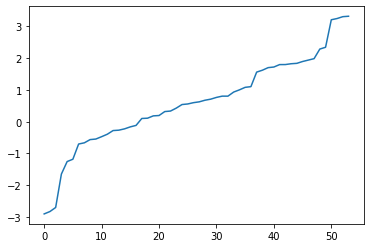

In [21]:
reg_const = ['d88', 'd89',
       'grant_1', 'grant']
K_const = panel_df[reg_const].shape[1]
X_const = panel_df[reg_const].values
y_const = panel_df['lscrap'].values
X_const = X_const.reshape([N, T, K])
y_const = y_const.reshape([N, T, 1])

fixed_effect = calculate_fe(X_const, y_const, beta = beta_fe)
fixed_effect = sorted(fixed_effect)
print('average fixed effect : ', np.mean(fixed_effect))
plt.plot(fixed_effect);

Wooldridge P 307の結果と一致。

### linearmodels and FE

#### Import

In [22]:
from linearmodels.panel import PanelOLS

#### data

In [23]:
data = reg_df.set_index(['fcode','year'])
data['constant'] = 1
data.head()

scrap  d88  d89    lscrap  grant_1  grant  constant
fcode    year                                                     
410523.0 1987   0.06    0    0 -2.813411        0      0         1
         1988   0.05    1    0 -2.995732        0      0         1
         1989   0.05    0    1 -2.995732        0      0         1
410538.0 1987   2.64    0    0  0.970779        0      0         1
         1988   2.74    1    0  1.007958        0      0         1

#### Regression

In [24]:
reg2 = ['d88', 'd89', 'grant_1', 'grant', 'constant']
mod = PanelOLS(data.lscrap, data[reg2], entity_effects=True)
res = mod.fit()
print(res)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 lscrap   R-squared:                        0.2010
Estimator:                   PanelOLS   R-squared (Between):             -0.0177
No. Observations:                 162   R-squared (Within):               0.2010
Date:                Tue, Apr 14 2020   R-squared (Overall):              0.0021
Time:                        22:22:40   Log-likelihood                   -80.946
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      6.5426
Entities:                          54   P-value                           0.0001
Avg Obs:                       3.0000   Distribution:                   F(4,104)
Min Obs:                       3.0000                                           
Max Obs:                       3.0000   F-statistic (robust):             6.5426
                            

なぜ`constant`が推定できる理由として、$y_{it} - X_{it}\hat\beta_{FE}$の平均を計算していると思われる。stdの計算はわからず。。。

In [25]:
reg_const = ['d88', 'd89',
       'grant_1', 'grant']
K_const = panel_df[reg_const].shape[1]
X_const = panel_df[reg_const].values
y_const = panel_df['lscrap'].values
X_const = X_const.reshape([N, T, K])
y_const = y_const.reshape([N, T, 1])

const_effect = y_const - X_const @ beta_fe
mean_fe = np.mean(const_effect)
std_fe = np.sqrt((np.sum(const_effect**2)/(N*T - K) - residual))

print(mean_fe, std_fe)

0.5974340498056494 1.5378766256192813


## Serial Correlation and Robust Variance Matrix Estimator

Assumptionの一つである$u_{it}$がidiosyncratic errorかどうかのテストをする必要がある。$\ddot u_{it}$は上述より、$\ddot u_{it-1}$に対してnagatively correlatedなので、$\ddot u_{it}$を$\ddot u_{it-1}$に回帰させ null hypothesisを

- $H_0: \delta= -1/(T-1)$
- $\delta = Corr(\ddot u_{it}, \ddot u_{it-1})$

で検定すれば良い。

仮に、検定の結果棄却された場合、the sandwitch formでcovariance matrixを推定すれば良い。このsandwitch formはTがNに対して比較的少ないときであれば、heteroskedasticityやserial correlationが存在するときでも使用できる

$$
\text{Avar}(\hat\beta_{FE}) = (\sum \ddot{X_i}'\ddot{X_i})^{-1}\left(\sum_{i}(\ddot{X_i}'\ddot{u_i}\ddot{u_i}'\ddot{X_i})\right)(\sum\ddot{X_i}'\ddot{X_i})^{-1}
$$



In [26]:
beta_fe, variance_fe, degree_of_freedom = panel_FE(X_fe, y_fe, sandwitch = True)

In [27]:
n = 0
std = np.diag(variance_fe)**(1/2)
for coef, col_name in zip(beta_fe, reg):
    t_value = round(coef[0]/std[n], 3)
    print('Sandwitch estimator\n')
    print(col_name, '\n coefficient :', round(coef[0], 3),
          '\n         std :', round(std[n], 3), 
          '\n     t-value :', t_value ,
          '\n     p-value :', round(t.cdf(t_value, degree_of_freedom) if t_value < 0 else 1 - t.cdf(t_value, degree_of_freedom) , 3), '\n')
    n+=1

Sandwitch estimator

d88_demean 
 coefficient : -0.08 
         std : 0.096 
     t-value : -0.838 
     p-value : 0.202 

Sandwitch estimator

d89_demean 
 coefficient : -0.247 
         std : 0.193 
     t-value : -1.284 
     p-value : 0.101 

Sandwitch estimator

grant_1_demean 
 coefficient : -0.422 
         std : 0.276 
     t-value : -1.526 
     p-value : 0.065 

Sandwitch estimator

grant_demean 
 coefficient : -0.252 
         std : 0.14 
     t-value : -1.798 
     p-value : 0.038 



Wooldridge P 311と一致。